In [57]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import vonmises_fisher 
from matplotlib.colors import Normalize
from vMF_distribution import VonMisesFisher

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
%autoreload 2

## Test von Mises Fisher density and sampling

In [7]:
n_grid = 100
# create 2D grid in a spherical coordinate theta and phi
u = np.linspace(0, np.pi, n_grid)
v = np.linspace(0, 2 * np.pi, n_grid)
u_grid, v_grid = np.meshgrid(u, v)

# convert to cartesian coordinates
vertices = np.stack([np.cos(v_grid) * np.sin(u_grid),
                     np.sin(v_grid) * np.sin(u_grid),
                     np.cos(u_grid)],
                    axis=2)
print('vertices.shape:', vertices.shape)

x = np.outer(np.cos(v), np.sin(u)) # outer product
y = np.outer(np.sin(v), np.sin(u))
z = np.outer(np.ones_like(u), np.cos(u))
print(f'x {x.shape}, y {y.shape}, z {z.shape}')

vertices.shape: (100, 100, 3)
x (100, 100), y (100, 100), z (100, 100)


mu norm 1.0
 pdf values 0.7951850391811838
 pdf values 3.1730982239824415
 pdf values 15.667044431526525


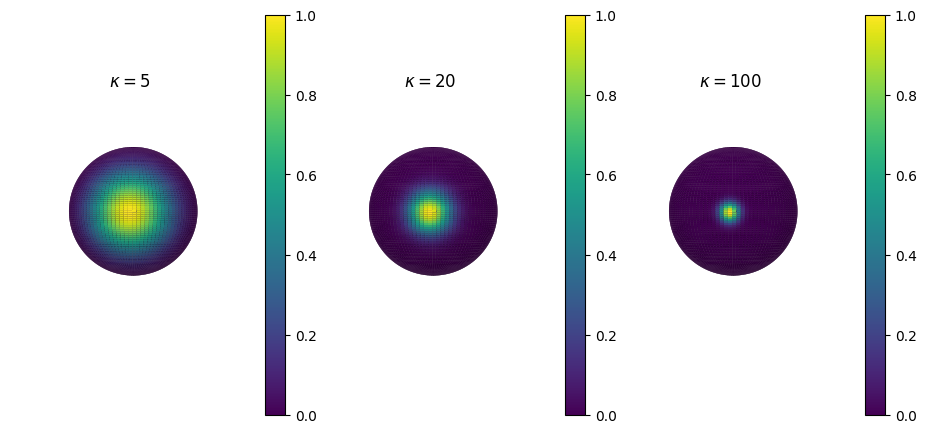

In [20]:
def plot_VMF_density(ax, x, y, z, vertices, mu, kappa):
    vmf = VonMisesFisher(mu, kappa)
    h, w = vertices.shape[:2]
    pdf_values = np.zeros((h, w))
    for i, j in np.ndindex(h, w):
        pdf_values[i, j] = vmf.pdf(vertices[i, j])
    
    print(f' pdf values {pdf_values.max()}')

    pdfnorm = Normalize(vmin=pdf_values.min(), vmax=pdf_values.max())

    m = ax.plot_surface(x, y, z, rstride=1, cstride=1,
                    facecolors = plt.cm.viridis(pdfnorm(pdf_values)),
                    linewidth=0)
    plt.colorbar(m, ax=ax)
    ax.set_aspect('equal')
    ax.view_init(azim=-130, elev=0)
    ax.axis('off')
    ax.set_title(rf"$\kappa={kappa}$")


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 4),
                         subplot_kw={"projection": "3d"})
left, middle, right = axes
mu = np.array([-np.sqrt(0.5), -np.sqrt(0.5), 0])
print('mu norm', np.linalg.norm(mu))
plot_VMF_density(left, x, y, z, vertices, mu, 5)
plot_VMF_density(middle, x, y, z, vertices, mu, 20)
plot_VMF_density(right, x, y, z, vertices, mu, 100)
plt.subplots_adjust(top=1, bottom=0.0, left=0.0, right=1.0, wspace=0.)
plt.show()

In [71]:
import torch
mu=torch.tensor([-np.sqrt(.5), -np.sqrt(.5), 0])
vmf = VonMisesFisher(mu=mu, kappa=15)



In [72]:
samples = vmf.sample(5)

In [73]:
samples.shape

torch.Size([5, 3])